In [9]:
import pandas as pd

from sklearn import linear_model

import statsmodels.api as sm

Stock_Market = pd.read_json('https://6iafiap.s3.amazonaws.com/data.json')
                
df = pd.DataFrame(Stock_Market, columns=['Year', 'Month', 'Interest_Rate', 'Unemployment_Rate', 'Stock_Index_Price'])

X = df[['Interest_Rate', 'Unemployment_Rate']]

Y =  df['Stock_Index_Price']

regr = linear_model.LinearRegression()
regr.fit(X,Y)

print('Intercept: \n', regr.intercept_)

print('Coefficients: \n', regr.coef_)

New_Interest_Rate = 2.57

New_Unemployment_Rate = 5.3

print('Predicted Stock Index Price With Scikit-Learn : \n', regr.predict([[New_Interest_Rate, New_Unemployment_Rate]]))

X =  sm.add_constant(X)

model = sm.OLS(Y, X).fit()

predictions = model.predict(X)

print(model.summary())

print('Predicted Stock Index Price With Statsmodels : \n', model.predict([[1,New_Interest_Rate,New_Unemployment_Rate]]))


Intercept: 
 1798.403977625855
Coefficients: 
 [ 345.54008701 -250.14657137]
Predicted Stock Index Price With Scikit-Learn : 
 [1360.66517299]
                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Tue, 10 Sep 2019   Prob (F-statistic):           4.04e-11
Time:                        00:23:50   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return getattr(obj, method)(*args, **kwds)


[[43.2        16.7       ]
 [30.83333333 74.66666667]
 [55.1        46.1       ]
 [27.75       55.        ]]


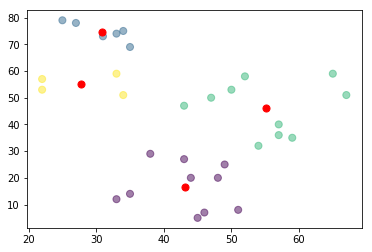

In [26]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

data = pd.read_csv('https://6iafiap.s3.amazonaws.com/datakmeans.csv', sep = ',')

df = pd.DataFrame(data, columns=['x', 'y'])

kmeans = KMeans(n_clusters=4).fit(df)
                  
centroids = kmeans.cluster_centers_

print(centroids)

plt.scatter(df['x'], df['y'], c = kmeans.labels_.astype(float), s=50, alpha=0.5)

plt.scatter(centroids[:,0], centroids[:,1], c = 'red', s=50)
                  

In [34]:
import pymysql
import pandas as pd

host = 'queendom.cluster-ckiswxihgwek.us-east-1.rds.amazonaws.com'
port = '3306'
user = 'admin'
password = 't1h7o0n2'
database = 'queendom'

conn = pymysql.connect(
    host=host,
    port=int(3306),
    user="root",
    passwd=password,
    db=database,
    charset='utf8mb4')

df = pd.read_sql_query("SHOW DATABASES;",
    conn)
print(df)

OperationalError: (2003, "Can't connect to MySQL server on 'queendom.cluster-ckiswxihgwek.us-east-1.rds.amazonaws.com' (timed out)")

In [29]:
!pip install pymysql

    100% |████████████████████████████████| 51kB 18.3MB/s ta 0:00:01
You are using pip version 10.0.1, however version 19.2.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
